In [1]:
# Importing the needed libraries
import pandas as pd 
import numpy as np 
import matplotlib 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [14]:
# reading cancer dataset
df = pd.read_csv("cancer_data.csv")
pd.set_option('display.max_columns', None) # used to display all the columns without hidding any
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,NaN,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,NaN,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Data Cleaning

In [4]:
# checking the shape of the dataset
df.shape

(569, 32)

In [5]:
# checking if columns are properly labeled
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE',
       'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE',
       'fractal_dimension_SE', 'radius_max', 'texture_max', 'perimeter_max',
       'area_max', 'smoothness_max', 'compactness_max', 'concavity_max',
       'concave_points_max', 'symmetry_max', 'fractal_dimension_max'],
      dtype='object')

In [32]:
# Checking the columns datatype
df.dtypes 

id                          int64
diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
radius_SE                 float64
texture_SE                float64
perimeter_SE              float64
area_SE                   float64
smoothness_SE             float64
compactness_SE            float64
concavity_SE              float64
concave_points_SE         float64
symmetry_SE               float64
fractal_dimension_SE      float64
radius_max                float64
texture_max               float64
perimeter_max             float64
area_max                  float64
smoothness_max            float64
compactness_max           float64
concavity_max             float64
concave_points

In [25]:
# Checking for missing values
df.isna().sum() 

id                         0
diagnosis                  0
radius_mean                0
texture_mean              21
perimeter_mean             0
area_mean                  0
smoothness_mean           48
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean             65
fractal_dimension_mean     0
radius_SE                  0
texture_SE                21
perimeter_SE               0
area_SE                    0
smoothness_SE             48
compactness_SE             0
concavity_SE               0
concave_points_SE          0
symmetry_SE               65
fractal_dimension_SE       0
radius_max                 0
texture_max               21
perimeter_max              0
area_max                   0
smoothness_max            48
compactness_max            0
concavity_max              0
concave_points_max         0
symmetry_max              65
fractal_dimension_max      0
dtype: int64

We have the following missing values:
texture_mean              21,
smoothness_mean           48,
symmetry_mean             65,
texture_SE                21,
smoothness_SE             48,
symmetry_SE               65,
texture_max               21,
smoothness_max            48,
symmetry_max              65.

In [29]:
#  Filling the missing values in all the columns with mean of each column since they have same datatype
df.fillna(df.mean(), inplace=True)

C:\Users\STUTERN\AppData\Local\Temp\ipykernel_1568\963294973.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [30]:
# Confirming if all missing values are filled with the mean of each column
df.isna().sum() 

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_SE                 0
texture_SE                0
perimeter_SE              0
area_SE                   0
smoothness_SE             0
compactness_SE            0
concavity_SE              0
concave_points_SE         0
symmetry_SE               0
fractal_dimension_SE      0
radius_max                0
texture_max               0
perimeter_max             0
area_max                  0
smoothness_max            0
compactness_max           0
concavity_max             0
concave_points_max        0
symmetry_max              0
fractal_dimension_max     0
dtype: int64

In [31]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,1.223139,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,25.660803,184.60,2019.0,0.16220,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.733900,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.410000,158.80,1956.0,0.12380,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.786900,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.530000,152.50,1709.0,0.14440,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.156000,3.445,27.23,0.006978,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.500000,98.87,567.7,0.13209,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.781300,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.670000,152.20,1575.0,0.13740,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
# Checking for duplicates and droping them
df.duplicated(keep='first').sum() # I have about 5 duplicates in the whole dataset

5

In [42]:
# Dropping the duplicate rows
df.drop_duplicates(keep="last", inplace=True) # I choose to drop the first duplicate row while keeping the last
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,1.223139,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,25.660803,184.60,2019.0,0.16220,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.733900,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.410000,158.80,1956.0,0.12380,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.786900,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.530000,152.50,1709.0,0.14440,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.156000,3.445,27.23,0.006978,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.500000,98.87,567.7,0.13209,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.781300,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.670000,152.20,1575.0,0.13740,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
# Confirming if the duplicates are dropped
df.duplicated().sum() 
# My dataset is now clean for Exploratory analysis and Visualization 

0

Data Exploration and Visualization

In [44]:
# Checking the correlation in the dataset
df.corr()

C:\Users\STUTERN\AppData\Local\Temp\ipykernel_1568\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
id,1.000000,0.075607,0.102670,0.074114,0.098309,-0.011705,-0.001029,0.050553,0.044276,-0.024495,-0.053689,0.143024,-0.007630,0.137388,0.178012,0.110277,0.033060,0.055072,0.078491,-0.024162,0.024708,0.082945,0.066221,0.080605,0.107834,0.009561,-0.004040,0.023186,0.035191,-0.043616,-0.031074
radius_mean,0.075607,1.000000,0.331186,0.997860,0.987259,0.164835,0.503133,0.673538,0.821903,0.143403,-0.312421,0.680919,-0.086652,0.674390,0.736381,-0.181697,0.200907,0.186968,0.370218,-0.098717,-0.045563,0.969622,0.301933,0.964873,0.940721,0.111963,0.411011,0.521646,0.741997,0.151770,0.008460
texture_mean,0.102670,0.331186,1.000000,0.337239,0.327695,-0.031267,0.248914,0.310958,0.300357,0.059612,-0.070453,0.290554,0.384896,0.297225,0.273008,-0.003250,0.198669,0.145575,0.162511,0.010778,0.058814,0.364372,0.912349,0.371456,0.355187,0.061187,0.291935,0.311284,0.304108,0.092931,0.131731
perimeter_mean,0.074114,0.997860,0.337239,1.000000,0.986278,0.199778,0.554102,0.712921,0.850334,0.177461,-0.262366,0.693840,-0.076507,0.693547,0.745671,-0.163366,0.245601,0.220575,0.401017,-0.077084,-0.008594,0.969810,0.308117,0.970342,0.941323,0.141476,0.453603,0.558673,0.769114,0.177428,0.052458
area_mean,0.098309,0.987259,0.327695,0.986278,1.000000,0.168539,0.494469,0.681669,0.821821,0.147273,-0.284551,0.735812,-0.057856,0.728040,0.801958,-0.132042,0.206624,0.199468,0.365263,-0.067056,-0.023315,0.963271,0.292213,0.959139,0.959465,0.114239,0.387394,0.506210,0.718935,0.131065,0.004355
smoothness_mean,-0.011705,0.164835,-0.031267,0.199778,0.168539,1.000000,0.619859,0.495531,0.527979,0.475315,0.536622,0.281491,0.052033,0.280938,0.233719,0.321836,0.292613,0.231668,0.353085,0.153489,0.255841,0.201075,0.033121,0.227862,0.193065,0.798387,0.435654,0.410892,0.475318,0.334616,0.453431
compactness_mean,-0.001029,0.503133,0.248914,0.554102,0.494469,0.619859,1.000000,0.882998,0.830033,0.580099,0.566385,0.496138,0.049238,0.546477,0.453181,0.135980,0.735935,0.565232,0.636762,0.220861,0.504927,0.534229,0.255524,0.588885,0.507293,0.528872,0.865923,0.815361,0.815065,0.510129,0.688678
concavity_mean,0.050553,0.673538,0.310958,0.712921,0.681669,0.495531,0.882998,1.000000,0.920147,0.487944,0.339009,0.634133,0.081366,0.660905,0.617585,0.108755,0.668336,0.687459,0.677951,0.172954,0.448862,0.687715,0.305918,0.728617,0.674262,0.423686,0.756092,0.882768,0.860114,0.406146,0.517849
concave_points_mean,0.044276,0.821903,0.300357,0.850334,0.821821,0.527979,0.830033,0.920147,1.000000,0.447900,0.166905,0.699074,0.025785,0.710050,0.689942,0.042508,0.485726,0.431686,0.608429,0.093712,0.254698,0.831243,0.296886,0.856487,0.809366,0.429544,0.667695,0.749400,0.909376,0.372024,0.370951
symmetry_mean,-0.024495,0.143403,0.059612,0.177461,0.147273,0.475315,0.580099,0.487944,0.447900,1.000000,0.448789,0.300613,0.115292,0.308078,0.222965,0.134667,0.412622,0.333945,0.380308,0.459728,0.325411,0.181697,0.075385,0.212988,0.174409,0.366352,0.452688,0.413539,0.418305,0.710563,0.413845


<Figure size 1600x1000 with 0 Axes>

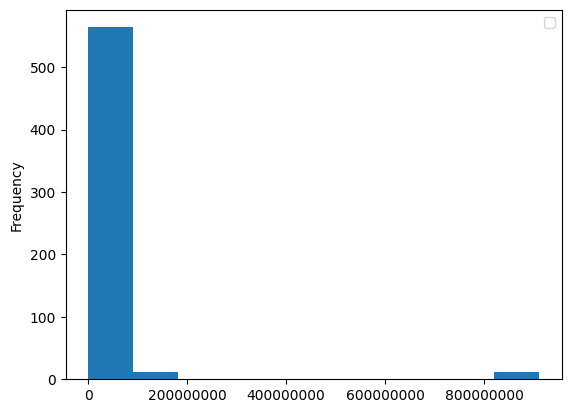

In [52]:
# Ploting a Histogram of the entire dataset
fig = plt.figure(figsize =(16, 10))
df.plot.hist()
plt.legend([]) # I used this to hide the legends
plt.ticklabel_format(useOffset=False, style='plain') #removing the scientific notation (1e8)
plt.show()


C:\Users\STUTERN\AppData\Local\Temp\ipykernel_1568\2247232714.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['radius_mean'], shade=True, color='red')


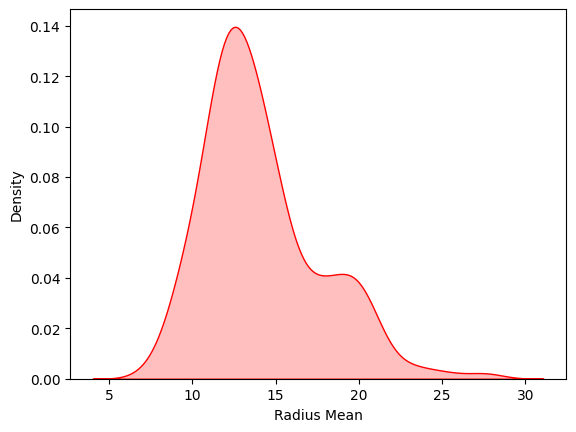

In [56]:
# Ploting KDE plot to check the distribution of the Radius Mean
sns.kdeplot(df['radius_mean'], shade=True, color='red')
plt.xlabel('Radius Mean')
plt.show()

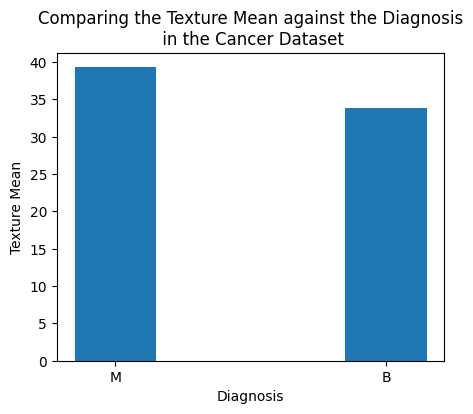

In [84]:
# Plotting a Bar plot to compare the Texture Mean against the Diagnosis in the Cancer Dataset
x = 'diagnosis'
y = 'texture_mean'
fig = plt.figure(figsize =(5, 4))
plt.bar(x,y, data=df, linewidth=2, width=0.3)
plt.title('Comparing the Texture Mean against the Diagnosis\n in the Cancer Dataset')
plt.xlabel('Diagnosis')
plt.ylabel('Texture Mean')
plt.show()

# And I noticed that the M has a higher Texture Mean compared to the B

C:\Users\STUTERN\AppData\Local\Temp\ipykernel_1568\3029357286.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\STUTERN\AppData\Local\Temp\ipykernel_1568\3029357286.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=1, mask= matrix)


<AxesSubplot: >

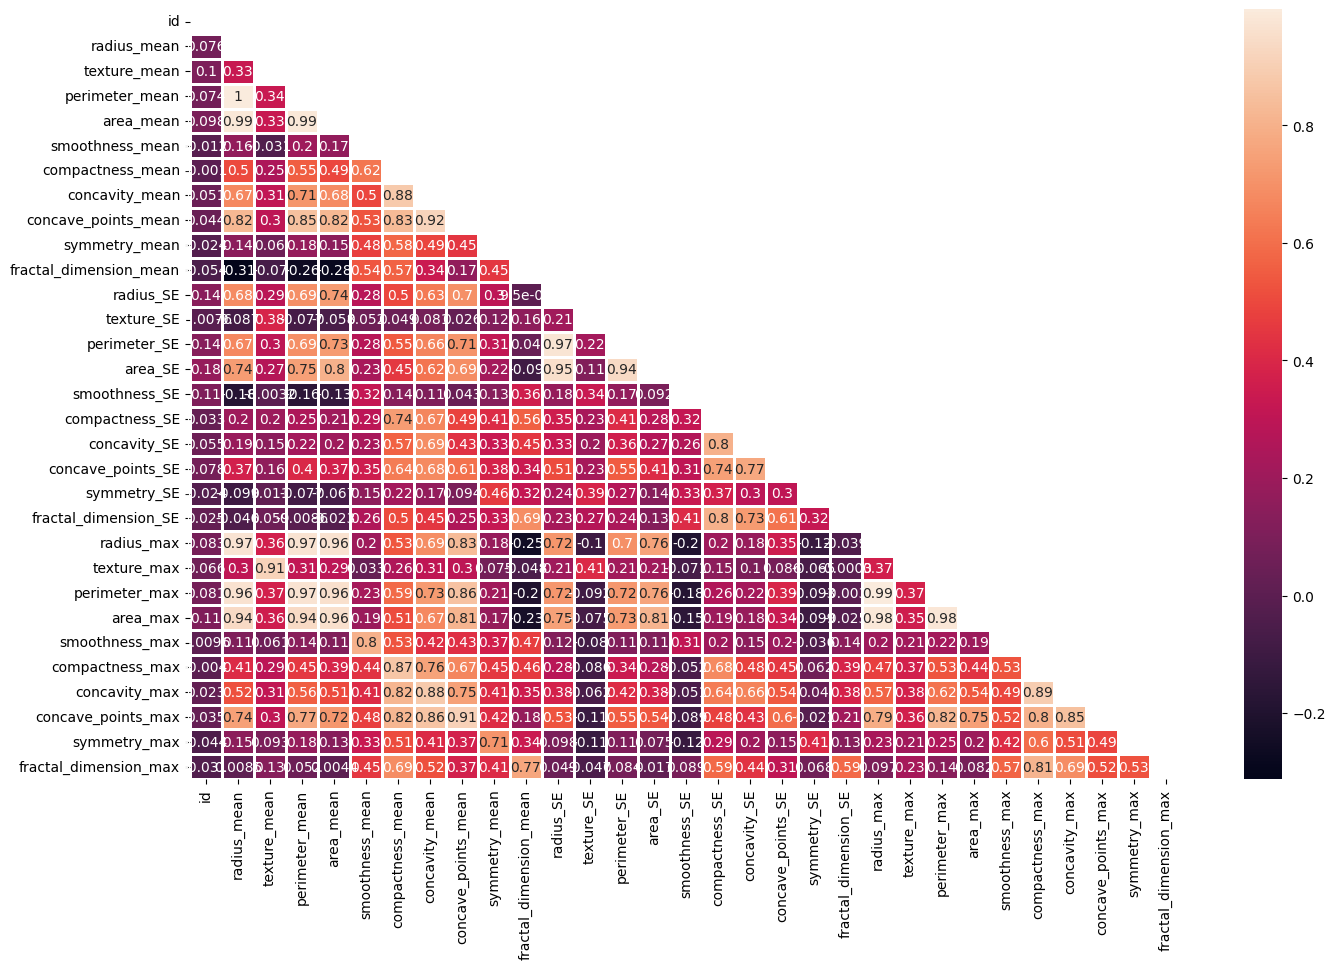

In [96]:
# Plotting a Correlation Heatmap of the Dataset
corr = df.corr()
matrix = np.triu(corr) # this is used to cut off the upper part of the correlation heatmap
fig = plt.figure(figsize =(16, 10))
sns.heatmap(df.corr(), annot=True, linewidths=1, mask= matrix)

# Please comment if this annot function is advisable. To me, I feel it's making the whole Heatmap look more difficult to interpret. 
# But I seek your advise from your experience on whether I should be using it or not.

One more thing I find abit difficult is a better way to explain my findings. I may get the result, but finding the right way and/or keyword to better explain it is where i find abit difficult. Is there a way you can help me or direct me to a platform where I can learn better. I really want to improve on that.